In [57]:
import psycopg2 
import psycopg2.extras
import password
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

conn = psycopg2.connect('host=pib1 user=pi password=' + password.get_password() + ' dbname=humidity_django_db')


In [100]:
cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)

#cur.execute("select * from humidity_display_humidity ORDER  BY log_date DESC LIMIT 10000")
cur.execute("select * from humidity_display_humidity")
print("The number of parts: ", cur.rowcount)
rows = cur.fetchall()
dates = {}
temp = {}
humidity = {}
for row in rows:
    if not row["hostname"] in dates:
        dates[row["hostname"]] = []
        temp[row["hostname"]] = []
        humidity[row["hostname"]] = []
    dates[row["hostname"]].append(row["log_date"])
    temp[row["hostname"]].append(row["temp"])
    humidity[row["hostname"]].append(row["humidity"])
    
#print(humidity)

The number of parts:  476068


<IPython.core.display.Javascript object>


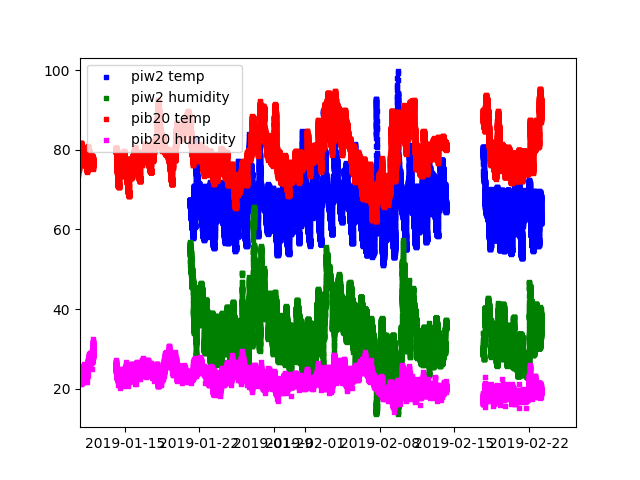

In [101]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
    
ax1.scatter(pd.to_datetime(dates['piw2'],utc=True), temp['piw2'], s=10, c='b', marker="s", label='piw2 temp')
ax1.scatter(pd.to_datetime(dates['piw2'],utc=True), humidity['piw2'], s=10, c='g', marker="s", label='piw2 humidity')
ax1.scatter(pd.to_datetime(dates['pib20'],utc=True), temp['pib20'], s=10, c='r', marker="s", label='pib20 temp')
ax1.scatter(pd.to_datetime(dates['pib20'],utc=True), humidity['pib20'], s=10, c='#ff00ff', marker="s", label='pib20 humidity')
plt.legend(loc='upper left');
plt.show()
